# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | darwin
Processing Record 5 of Set 1 | bontang
Processing Record 6 of Set 1 | chadron
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | horta
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | jalai nur
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | labrador city
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | south bay
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | kayangel
Processing Record 21 of Set 1 | santyoku
Processing Record 22 of Set 1 | puerto san carlos
Cit

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.99,77,99,11.29,TF,1733712523
1,iqaluit,63.7506,-68.5145,-20.73,70,75,10.80,CA,1733712524
2,waitangi,-43.9535,-176.5597,16.01,97,98,5.36,NZ,1733712526
3,darwin,-12.4611,130.8418,32.72,62,75,5.66,AU,1733712472
4,bontang,0.1333,117.5000,28.71,69,68,1.59,ID,1733712528


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.99,77,99,11.29,TF,1733712523
1,iqaluit,63.7506,-68.5145,-20.73,70,75,10.80,CA,1733712524
2,waitangi,-43.9535,-176.5597,16.01,97,98,5.36,NZ,1733712526
3,darwin,-12.4611,130.8418,32.72,62,75,5.66,AU,1733712472
4,bontang,0.1333,117.5000,28.71,69,68,1.59,ID,1733712528


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

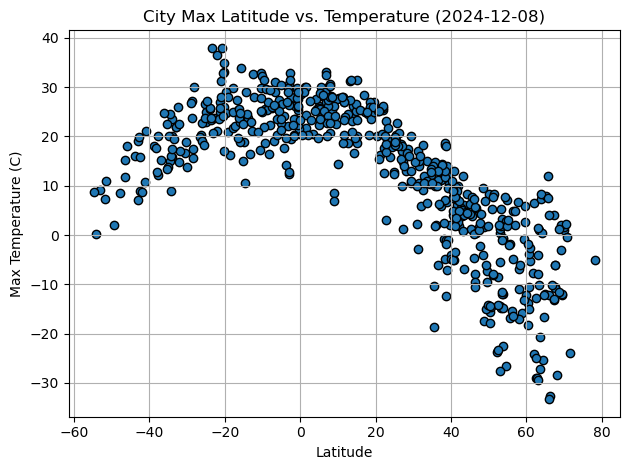

In [9]:

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-12-08)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

<Figure size 640x480 with 0 Axes>

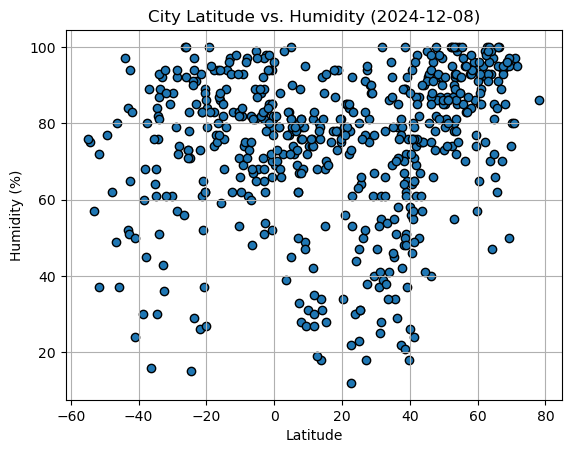

In [10]:


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-12-08)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

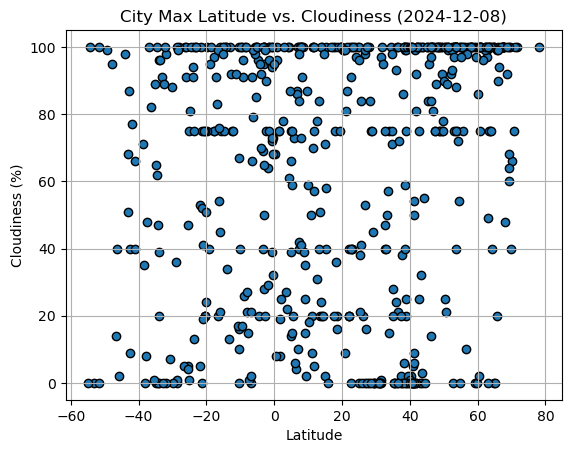

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-12-08)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

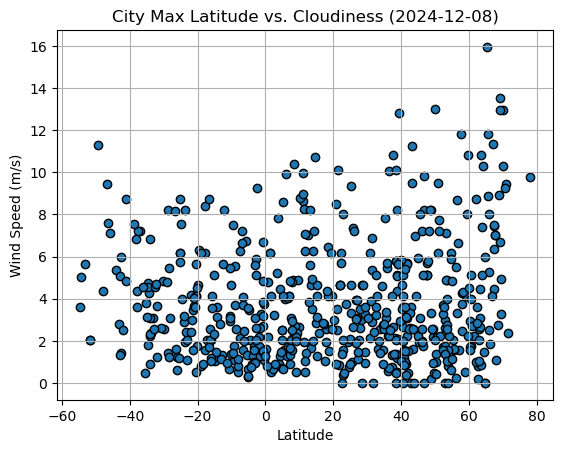

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-12-08)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def compute_linear_regression(x_values, y_values):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    print(f"The r^2 Value is: {r_value**2:}")

    return slope, intercept

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-20.73,70,75,10.80,CA,1733712524
4,bontang,0.1333,117.5000,28.71,69,68,1.59,ID,1733712528
5,chadron,42.8294,-102.9999,3.87,50,75,3.60,US,1733712529
7,jamestown,42.0970,-79.2353,1.80,98,100,0.45,US,1733712531
8,horta,38.5333,-28.6333,18.34,89,100,5.81,PT,1733712532


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.99,77,99,11.29,TF,1733712523
2,waitangi,-43.9535,-176.5597,16.01,97,98,5.36,NZ,1733712526
3,darwin,-12.4611,130.8418,32.72,62,75,5.66,AU,1733712472
6,edinburgh of the seven seas,-37.0676,-12.3116,15.32,89,100,7.23,SH,1733712530
9,lebu,-37.6167,-73.6500,12.18,80,48,7.22,CL,1733712382


###  Temperature vs. Latitude Linear Regression Plot

The r^2 Value is: 0.7065500750029367


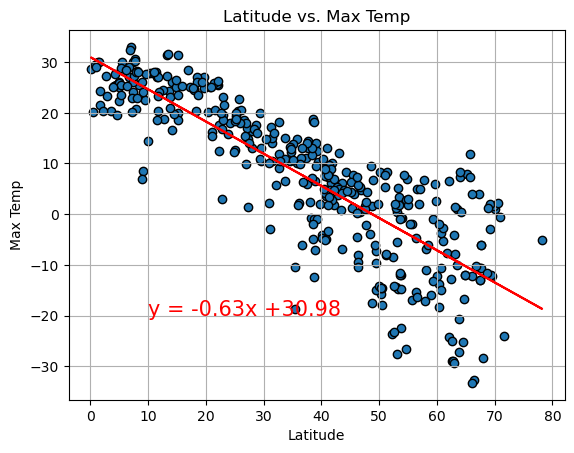

In [16]:
# Linear regression on Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.3215602163369983


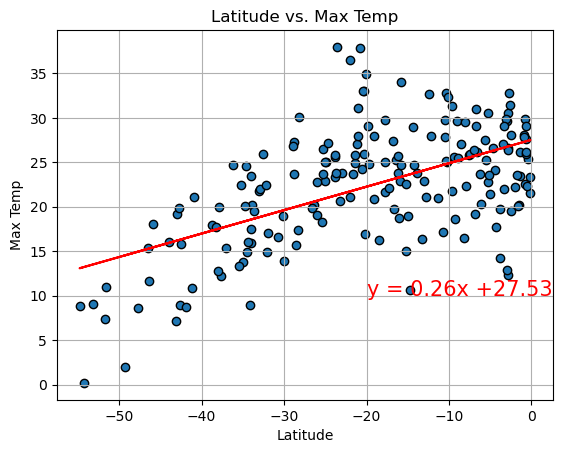

In [ ]:
# Linear regression on Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
plt.grid(True)
plt.show()


![Image](https://cdn.britannica.com/85/178785-004-1A421574.jpg) (1)

**Discussion about the linear relationship:** 

### Northern Hemisphere:
**R-squared value = 0.7065; line equation: y= -0.63x + 30.98**

It can be concluded that:

     a. There is *strong negative correlation (-0.63)* between latitude and maximum temperature; so, as we move away from equator the temperature decreases significantly in Northern hemisphere.
     b. R-squared value shows that there is *70.65% of variance* in maximum temperature.
     c. The y-intercept 30.98 suggest higher temperature near the equator.
     
### Southern Hemispehre:
 **R-squared value = 0.3215; line equation: y= 0.26x + 27.53**
 
It can be concluded that:

     a.There is *weak positive correlation (0.26)* between latitude and maximum temperature; so, as we move away from equator the change in temperature is less as compared to change in temperature in Southern hemisphere.
     b. R-squared value suggest that there is *32.15% of variance* in maximum temperature.
     c. The y-intercept 27.53 shows somewhat lower temperature near the equator as compared to Nothern hemisphere

**Other Factors:**

Other factors which might affect max temperature in Northern hemisphere could be larger land mass in the north while in southern hemisphere there are larger water bodies as compared to northern hemisphere.  

The r^2 Value is: 0.12570842335886678


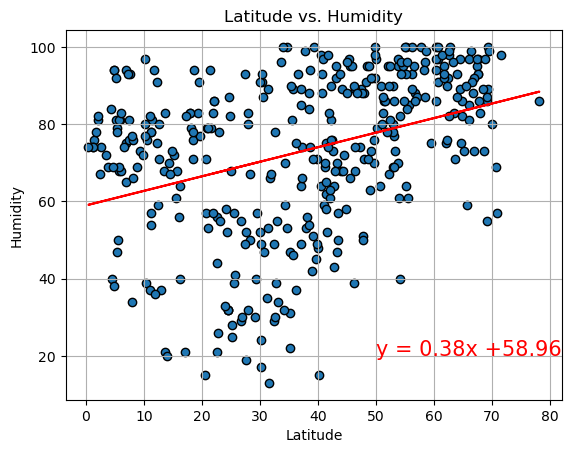

In [33]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.037687641810851685


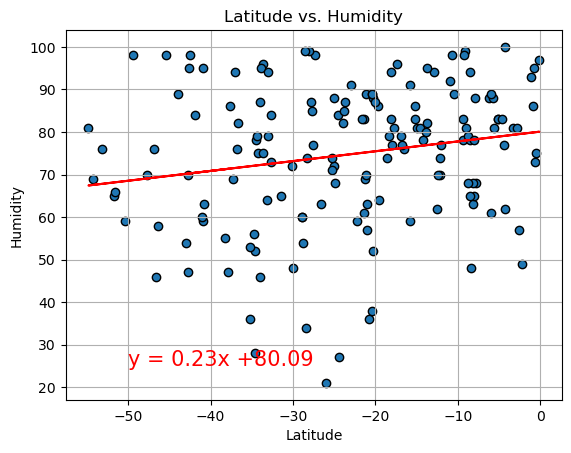

In [37]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

### Northern Hemisphere:

**R-squared value = 0.1257; Line equation: y = 0.38x + 58.96**

It can be concluded that:

    a. There is a weak positive correlation (0.38) between latitude and humidity; as latitude increases (moving away from the equator), humidity levels tend to increase slightly in the Northern Hemisphere.
    b. The R-squared value indicates that only 12.57% of the variance suggests that other factors plays significant role in humidity levels as compared to latitude.
    c. The y-intercept of 58.96 shows higher humidity near equator.

### Southern Hemisphere:

**R-squared value = 0.0377; Line equation: y = 0.23x + 80.09**

It can be concluded that:

    a. There is a very weak positive correlation (0.23) between latitude and humidity; as latitude increases, the change in humidity is minimal in the Southern Hemisphere.
    b. The R-squared value suggests that only 3.77% of the variance indicates that latitude has a negligible effect on humidity.
    c. The Southern Hemisphere y-intercept of 80.09 means higher humidity levels near equator.

**Other Factors:**

Some other factors including greater land mass, temperature, precipitation patterns, and geographical features, play a significant role in influencing humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 Value is: 0.06764114464909966


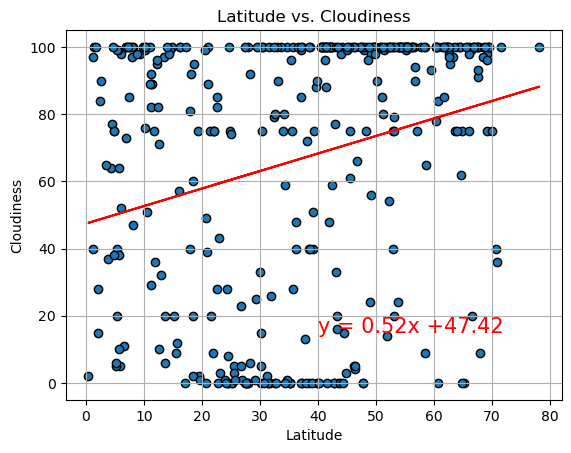

In [39]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.0923207192105898


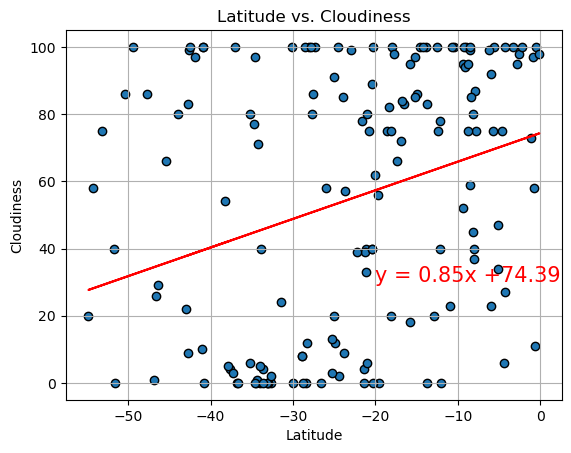

In [41]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")
plt.grid(True)
plt.show()

**Discussion about the linear relationship:** 

### Northern Hemisphere:

**R-squared value = 0.0676; line equation: y = 0.52x + 47.42**

It can be concluded that:

    a. There is a moderate positive correlation (0.52) between latitude and cloudiness; as we move away from the equator, cloudiness levels tend to increase in the Northern Hemisphere.
    b. The R-squared value indicates that only 6.76% of the variance in cloudiness is explained by latitude.
    c. The y-intercept of 47.42 indicates the equator cloudiness is higher.

### Southern Hemisphere:

**R-squared value = 0.0923; line equation: y = 0.85x + 74.39**

It can be concluded that:

    a. There is a stronger positive correlation (0.85) between latitude and cloudiness; as latitude increases, cloudiness levels tend to rise more significantly in the Southern Hemisphere compared to the Northern Hemisphere.
    b. The R-squared value suggests that 9.23% of the variance indicates that latitude has some influence on cloud cover.
    c. The y-intercept of 74.39 indicates that at the equator, the expected cloudiness level is higher.

**Other Factors:**

Other factors, such as local climate conditions, geographical features, and atmospheric influences, significantly affects cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 Value is: 0.01797381605996604


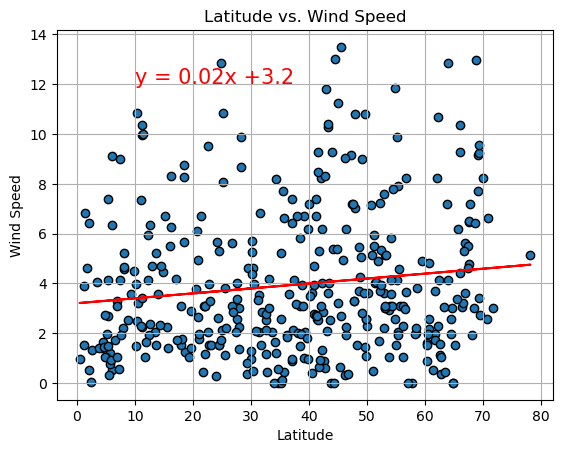

In [42]:
# Northern Hemisphere
slope, intercept = compute_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black")
plt.plot(northern_hemi_df["Lat"], slope * northern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.grid(True)
plt.show()

The r^2 Value is: 0.09413447805398514


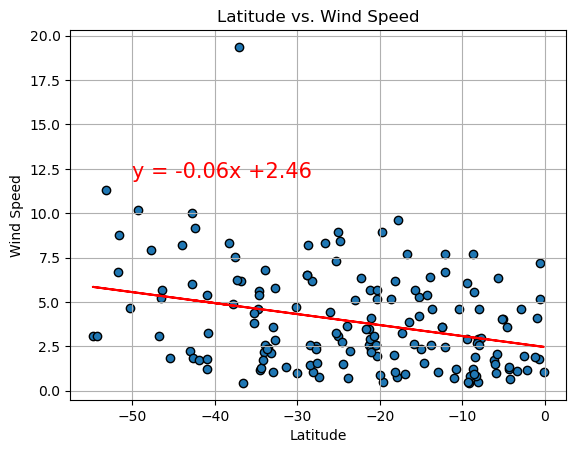

In [43]:
# Southern Hemisphere
slope, intercept = compute_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black")
plt.plot(southern_hemi_df["Lat"], slope * southern_hemi_df["Lat"] + intercept, color="red")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.grid(True)
plt.show()

### Northern Hemisphere:

**R-squared value = 0.0180; line equation: y = 0.02x + 3.2**

It can be concluded that:

    a. There is a very weak positive correlation (0.02) between latitude and wind speed; as latitude increases, wind speed tends to increase slightly in the Northern Hemisphere.
    b. The R-squared value indicates that only 1.80% of the variance in wind speed which suggests lower affect of latitude on cloud levels
    c. The y-intercept of 3.2 indicates that at the equator there is typically calm conditions.
### Southern Hemisphere:

**R-squared value = 0.0941; line equation: y = -0.06x + 2.46**

It can be concluded that:

    a. There is a weak negative correlation (-0.06) between latitude and wind speed; as latitude increases, wind speed tends to decrease slightly in the Southern Hemisphere.
    b. The R-squared value suggests that 9.41% of the variance in wind speed indicating that while latitude has some influence on wind patterns.
    c. The y-intercept of 2.46 indicates that at the equator, the expected wind speed lower.

**Other Factors:**

Other factors—such as local topography, temperature gradients, and atmospheric pressure plays significant role in influencing wind speed.


                                    References

 1) © Encyclopædia Britannica, Inc.
    *https://kids.britannica.com/students/assembly/view/278642*